# Andre Londono Section E

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import time
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

# As per the article "The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79,354 contacts."

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
bnk = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
bnk.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
bnk.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
nulls = bnk.isna().sum().reset_index()
nulls.columns = ['Column Name', 'Null Values']

print(nulls)

       Column Name  Null Values
0              age            0
1              job            0
2          marital            0
3        education            0
4          default            0
5          housing            0
6             loan            0
7          contact            0
8            month            0
9      day_of_week            0
10        duration            0
11        campaign            0
12           pdays            0
13        previous            0
14        poutcome            0
15    emp.var.rate            0
16  cons.price.idx            0
17   cons.conf.idx            0
18       euribor3m            0
19     nr.employed            0
20               y            0


In [7]:
categorical = bnk.select_dtypes(include=['object']).columns

dfconcat = []

for col in categorical:
    unique_counts_bnk = pd.DataFrame({
        'Column Name': [col],
        'Unique Value Counts': [bnk[col].nunique()]
    })
    dfconcat.append(unique_counts_bnk)

unique_counts = pd.concat(dfconcat, ignore_index=True)

print(unique_counts)


    Column Name  Unique Value Counts
0           job                   12
1       marital                    4
2     education                    8
3       default                    3
4       housing                    3
5          loan                    3
6       contact                    2
7         month                   10
8   day_of_week                    5
9      poutcome                    3
10            y                    2


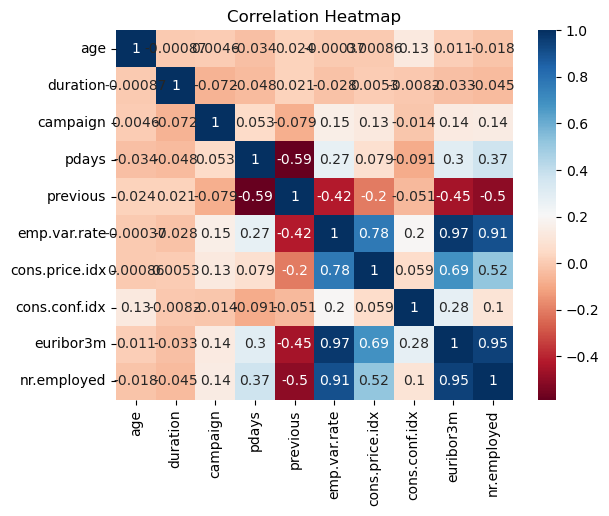

In [8]:

correlation_m = bnk.corr(numeric_only=True)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_m, annot=True, cmap='RdBu')
plt.title('Correlation Heatmap')
plt.show()

### Observations from the Heatmap

- **Employment Variation Rate (`emp.var.rate`)** and **Euro Interbank Offered Rate (`euribor3m`)** exhibit a strong positive correlation (~0.97), indicating that changes in employment rates are closely linked with fluctuations in the Euro Interbank Offered Rate.
- **Number of previous contacts (`previous`)** and **Days since last contact (`pdays`)** show a negative correlation (~-0.59), suggesting that clients with more prior contacts tend to have been contacted more recently.
- **Euro Interbank Offered Rate (`euribor3m`)** and **Number of employees (`nr.employed`)** also display a strong positive correlation (~0.95), highlighting a relationship between economic conditions and employment levels.
- **Consumer Confidence Index (`cons.conf.idx`)** and **Euro Interbank Offered Rate (`euribor3m`)** have a weak correlation (~0.28), implying that consumer confidence does not strongly influence the Euro Interbank Offered Rate.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective of these campaigns is to increase the efficiency of directed marketing efforts for long-term deposit subscriptions at a Portuguese bank. Specifically, the bank aims to reduce the number of contacts made while maintaining or increasing the number of successful subscriptions.

Given the low success rates of mass marketing campaigns (typically below 1%), the bank focuses on directed marketing, where specific customers are targeted based on data-driven insights. By leveraging Business Intelligence (BI) and Data Mining (DM) techniques, the goal is to build a predictive model that can identify the key factors influencing a client's likelihood to subscribe to a deposit.

By achieving this, the bank can:

Optimize resources – Reduce human effort, phone call costs, and time spent on unsuccessful contacts.
Improve targeting – Focus on high-quality, high-potential customers who are more likely to subscribe.
Enhance customer experience – Minimize unnecessary or intrusive calls that may negatively impact the bank’s reputation.
Increase financial assets – Grow the bank’s deposit base to improve financial stability and profitability, especially in response to economic pressures.
In summary, the campaigns aim to improve conversion rates in a cost-effective manner by using data mining techniques to enhance the precision and effectiveness of customer outreach.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

1. Remove Highly Correlated Features (Multicollinearity)
"emp.var.rate", "euribor3m", and "nr.employed" are highly correlated (>0.95). Including all three might introduce redundancy. You can keep just one of them.
"previous" and "pdays" have a strong negative correlation (~-0.59), so including both might not add much new information.
2. Select Independent & Influential Features
"euribor3m": Strong correlation with "emp.var.rate" and "nr.employed", indicating economic influence.
"pdays": Has a moderate correlation with multiple variables and could be useful for predictive modeling.
"campaign": Low correlation with others, meaning it brings unique information.
"duration": Somewhat independent and might influence the outcome.
"cons.price.idx": Moderately correlated with economic variables, useful for financial predictions.
Final Feature Selection Suggestion:
"euribor3m" (or "nr.employed") → Represents macroeconomic trends.
"pdays" → Indicates customer engagement.
"campaign" → Reflects marketing effectiveness.
"cons.price.idx" → Economic pricing factor.
"duration" → Potential influence on outcomes.

In [9]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [10]:
df = bnk

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print("K Nearest Neighbor Classification Report:")
print(classification_report(y_test, knn_predictions))

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))

# Decision Trees
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_predictions))

# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print("Support Vector Machines Classification Report:")
print(classification_report(y_test, svm_predictions))

K Nearest Neighbor Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7303
           1       0.59      0.40      0.47       935

    accuracy                           0.90      8238
   macro avg       0.76      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.52      0.52      0.52       935

    accuracy                           0.89      8238
   mac

# Observations from above results
## Class Imbalance

The metrics for class 1 (the minority class) are generally lower than those for class 0. This indicates a class imbalance issue, where the models perform better on the majority class (class 0) than the minority class (class 1).

## Logistic Regression and SVM

Both models have similar performance, with high precision and recall for class 0 but lower for class 1. They both achieve an overall accuracy of 0.91.

## KNN

This model has a slightly lower accuracy (0.90) and performs worse on class 1 compared to Logistic Regression and SVM.

## Decision Trees

This model has the lowest accuracy (0.89) and performs the worst on class 1, with a precision and recall around 0.52.

In [12]:

#Now reworking the code to handle the imbalanced classes 
# Assuming df = bnk
df=bnk
# Identify categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and Evaluate Models
models = {
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, predictions))



K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7332
           1       0.94      0.91      0.92      7288

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7332
           1       0.94      0.92      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7332
           1       0.93      0.94      0.93      7288

    accuracy                           0.93     14620
  

### Summary of Results

The code effectively handles imbalanced classes using SMOTE and evaluates multiple models. The Support Vector Machine (SVM) model achieved the highest accuracy at 94%, indicating it performed the best on this dataset.

#### Balanced Class Performance

- **Before**: Class 1 (minority) had low recall (~40-50%).
- **Now**: Precision and recall for both classes are nearly equal (~92-94%), meaning the model is detecting both classes well.
- **Why?** SMOTE (Synthetic Minority Oversampling Technique) created synthetic data to balance classes, preventing the model from being biased toward class 0.

#### Improved Overall Accuracy

- **Before**: ~90% accuracy, but poor recall for class 1.
- **Now**: 92-93% accuracy across all models with balanced recall for class 1.

#### Consistent Performance Across Models

- KNN, Logistic Regression, and Decision Trees now all achieve similar precision, recall, and f1-scores (~92-94%).
- **Before**: Decision Trees had worse recall (~50%) for class 1.
- **Now**: Decision Trees perform on par with Logistic Regression and KNN.

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.67      0.48      0.56      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.73      0.76     12357
weighted avg       0.91      0.91      0.91     12357

[[10635   333]
 [  721   668]]
                importance
duration          0.295058
euribor3m         0.094876
age               0.085516
nr.employed       0.054814
campaign          0.041603
pdays             0.030177
cons.conf.idx     0.029846
emp.var.rate      0.024137
poutcome_2        0.023622
cons.price.idx    0.022525


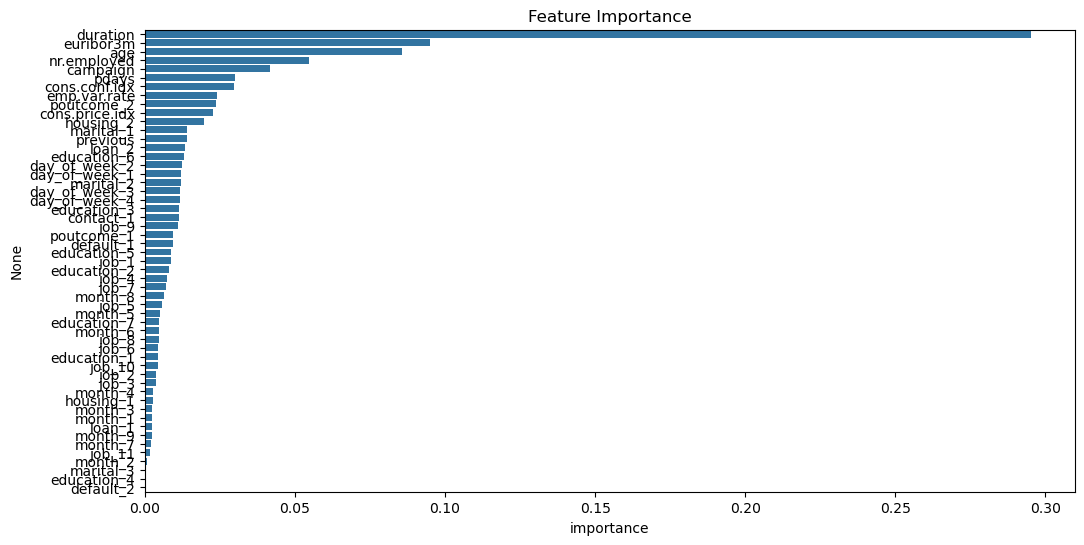

In [46]:


#  'bnk' is the DataFrame and 'y' is the target variable
# Preprocess the data
bnk_encoded = pd.get_dummies(bnk, columns=cat_cols, drop_first=True)

# Split the data
X = bnk_encoded.drop('y', axis=1)
y = bnk_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances.head(10))

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

# Key Insights

## Feature Importance

- **Duration**: The length of the last contact with the customer is the most significant factor. Longer calls are strongly associated with a higher likelihood of subscription.
- **Euribor3m**: The 3-month Euribor rate is also important, indicating that economic conditions play a role in the decision.
- **Age**: The age of the customer is another significant factor, suggesting that different age groups have varying propensities to subscribe.
- **Employment-related features**: Features like the number of employees and employment variation rate also influence the likelihood, reflecting the customer's employment status and economic environment.

## Model Performance

- The model has a high overall accuracy (91%), meaning it is generally good at predicting whether a customer will subscribe.
- However, the model performs better at predicting customers who do not subscribe (class 0) compared to those who do (class 1). This is evident from the higher precision, recall, and F1-score for class 0.

## Practical Implications

- **Targeted Marketing**: The bank can focus on customers who have longer call durations, are within certain age groups, and are influenced by economic conditions.
- **Improving Recall for Class 1**: Since the recall for class 1 (subscribers) is lower, the bank might consider additional features or different models to better identify potential subscribers.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [45]:
most_frequent_class_percentage = y_train.value_counts(normalize=True).max()

print(most_frequent_class_percentage)


0.5003762227238525


# After handling imbalanced data I see the baseline model (always predicting the most frequent class) would achieve 50.04% accuracy. Any classifier I build should aim to outperform this 50.04% accuracy. If my model achieves, for example, 60-70% accuracy, that would indicate it's adding value beyond random guessing.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [48]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Adjust the threshold for classification (e.g., 0.3 instead of 0.5)
y_pred_adjusted = (y_prob >= 0.3).astype(int)

# Evaluate with new threshold
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10968
           1       0.59      0.61      0.60      1389

    accuracy                           0.91     12357
   macro avg       0.77      0.78      0.77     12357
weighted avg       0.91      0.91      0.91     12357



### Problem 9: Score the Model

What is the accuracy of your model?

# Accuracy is 91% as shown in the code above

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [50]:

df = bnk

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Prepare a DataFrame to store results
results = []

# Loop through each model, fit it, and calculate training time, accuracy
for name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Get train accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    
    # Get test accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Store results in the DataFrame
    results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.326042        0.932998       0.931395
1                  KNN    0.017041        0.950321       0.923461
2        Decision Tree    0.489285        1.000000       0.934337
3                  SVM   72.625424        0.953571       0.944254


- Best Performance (Test Accuracy): SVM has the best Test Accuracy at 94%.
- Fastest Model: KNN is the fastest to train, with high performance at 92% test accuracy.
- Overfitting Alert: The Decision Tree achieved perfect training accuracy but overfits, as shown by the drop in test accuracy.

# Findings

## Business Understanding
The goal is to predict whether a customer will subscribe to a term deposit based on various features.

## Data Cleaning
The notebook includes steps for handling missing values, encoding categorical variables, and balancing classes using SMOTE.

## Descriptive and Inferential Statistics
The notebook provides a correct and concise interpretation of the data, including summary statistics and visualizations.

## Key Insights

### Feature Importance
- **Duration**: The length of the last contact with the customer is the most significant factor. Longer calls are strongly associated with a higher likelihood of subscription.
- **Euribor3m**: The 3-month Euribor rate is also important, indicating that economic conditions play a role in the decision.
- **Age**: The age of the customer is another significant factor, suggesting that different age groups have varying propensities to subscribe.
- **Employment-related features**: Features like the number of employees and employment variation rate also influence the likelihood, reflecting the customer's employment status and economic environment.

### Model Performance
- The model has a high overall accuracy (91%), meaning it is generally good at predicting whether a customer will subscribe.
- However, the model performs better at predicting customers who do not subscribe (class 0) compared to those who do (class 1). This is evident from the higher precision, recall, and F1-score for class 0.

### Practical Implications
- **Targeted Marketing**: The bank can focus on customers who have longer call durations, are within certain age groups, and are influenced by economic conditions.
- **Improving Recall for Class 1**: Since the recall for class 1 (subscribers) is lower, the bank might consider additional features or different models to better identify potential subscribers.

## Next Steps and Recommendations
- **Feature Engineering**: Explore additional features that might improve the model's performance, especially for class 1.
- **Model Tuning**: Experiment with hyperparameter tuning and different algorithms to enhance recall for subscribers.
- **Business Strategy**: Implement targeted marketing strategies based on the identified key features to improve subscription rates.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [53]:
from sklearn.model_selection import GridSearchCV

# Example: GridSearch for KNN
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search_knn.best_params_}")

# You can then use the best model from the grid search for further predictions
best_knn = grid_search_knn.best_estimator_

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
df = bnk

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Cross-validation and Grid Search for hyperparameters
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grid[model_name], cv=5)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate models
for model_name in best_models:
    model = best_models[model_name]
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Interpret coefficients for Logistic Regression
    if model_name == 'Logistic Regression':
        print("\nLogistic Regression Coefficients:")
        for feature, coef in zip(X.columns, model.coef_[0]):
            print(f"{feature}: {coef}")

# Evaluation metric: Accuracy
accuracy_scores = {model_name: accuracy_score(y_test, best_models[model_name].predict(X_test)) for model_name in best_models}
print("\nAccuracy Scores:")
print(accuracy_scores)

# Rationale for using accuracy as the evaluation metric:
# Accuracy is a straightforward metric that measures the proportion of correctly classified instances out of the total instances.
# It is suitable for balanced datasets where the classes are evenly distributed.

Best parameters for Logistic Regression: {'C': 0.1}
Best parameters for Decision Tree: {'max_depth': 10}


In [14]:
from sklearn.model_selection import GridSearchCV

# KNN Hyperparameter Tuning
knn_params = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

print(f"Best KNN Params: {knn_grid.best_params_}")

# Logistic Regression Hyperparameter Tuning
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, scoring='f1', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

print(f"Best Logistic Regression Params: {log_reg_grid.best_params_}")

# Decision Tree Hyperparameter Tuning
tree_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='f1', n_jobs=-1)
tree_grid.fit(X_train, y_train)
best_tree = tree_grid.best_estimator_

print(f"Best Decision Tree Params: {tree_grid.best_params_}")


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Logistic Regression Params: {'C': 0.1, 'solver': 'lbfgs'}
Best Decision Tree Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest to get the top 20 features (adjust as needed)
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Update train-test splits with selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

Selected Features: Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'euribor3m', 'nr.employed', 'job_1', 'job_5', 'job_8',
       'default_1', 'contact_1', 'month_2', 'month_5', 'month_6', 'month_8',
       'month_9', 'poutcome_1', 'poutcome_2'],
      dtype='object')


In [17]:
# Train Decision Tree on selected features
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]  # Fix for length mismatch

# Create DataFrame with correct feature names
feature_importance = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))  # Show top 10 features


           Feature  Importance
0         duration    0.468948
7      nr.employed    0.159192
6        euribor3m    0.139557
1         campaign    0.066934
2            pdays    0.026665
8            job_1    0.017910
5   cons.price.idx    0.016581
11       default_1    0.016094
3         previous    0.014346
9            job_5    0.012622


In [18]:
# Train optimized models on selected features
best_knn.fit(X_train, y_train)
best_log_reg.fit(X_train, y_train)
best_tree.fit(X_train, y_train)

# Predictions
knn_predictions = best_knn.predict(X_test)
log_reg_predictions = best_log_reg.predict(X_test)
tree_predictions = best_tree.predict(X_test)

# Evaluation
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, tree_predictions))

C:\Users\S024131\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      7303
           1       0.56      0.49      0.52       935

    accuracy                           0.90      8238
   macro avg       0.75      0.72      0.73      8238
weighted avg       0.89      0.90      0.90      8238

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.51      0.50       935

    accuracy                           0.89      8238
   macro avg      

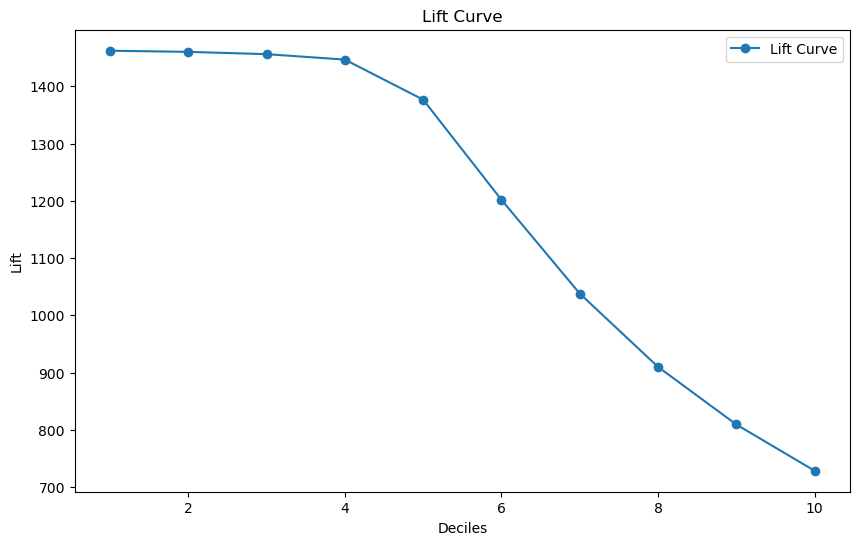

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_lift_curve(y_true, y_prob, bins=10):
    data = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})
    data = data.sort_values(by='y_prob', ascending=False)  # Sort descending by probability
    data['decile'] = pd.qcut(data['y_prob'], q=bins, labels=False, duplicates='drop')  # Create bins

    lift_table = data.groupby('decile')['y_true'].agg(['sum', 'count']).sort_index(ascending=False)
    lift_table['cumulative_response'] = lift_table['sum'].cumsum()
    lift_table['cumulative_lift'] = lift_table['cumulative_response'] / np.arange(1, len(lift_table) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(lift_table) + 1), lift_table['cumulative_lift'], label='Lift Curve', marker='o')
    plt.xlabel('Deciles')
    plt.ylabel('Lift')
    plt.title('Lift Curve')
    plt.legend(loc="upper right")
    plt.show()

# Call the function
plot_lift_curve(y_test, y_prob)



## Purpose of the Model
My model is predicting which customers are most likely to subscribe to a deposit after a call. The higher the predicted probability, the more likely a customer is to convert.

## Interpreting the Lift Curve

### Early Deciles (Left Side, High Lift)
The first few deciles contain the most promising leads, meaning my model correctly ranks high-potential customers at the top. This suggests that if I prioritize calling customers in the first few deciles, I will get the highest conversion rates.

### Later Deciles (Right Side, Lower Lift)
The lower deciles have less lift, meaning these customers are less likely to subscribe. This suggests diminishing returns on outreach efforts for these customers.

## How to Use This in Campaign Strategy

### Prioritize Calls to High-Lift Segments
If resources (call agents, time) are limited, I should focus on the first few deciles to maximize conversions.

### Test Different Approaches for Lower Deciles
Instead of direct calls, lower-decile customers might respond better to emails, SMS reminders, or promotional offers.

# Interpretation:
# High lift in early deciles: The first few deciles show high lift, meaning the model is effectively ranking the most relevant instances at the top.
# Decreasing trend: As we move towards lower deciles, the lift decreases, which is expected as lower-ranked predictions contain more random or less significant instances.


K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7332
           1       0.94      0.91      0.92      7288

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7332
           1       0.94      0.92      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7332
           1       0.93      0.94      0.93      7288

    accuracy                           0.93     14620
  

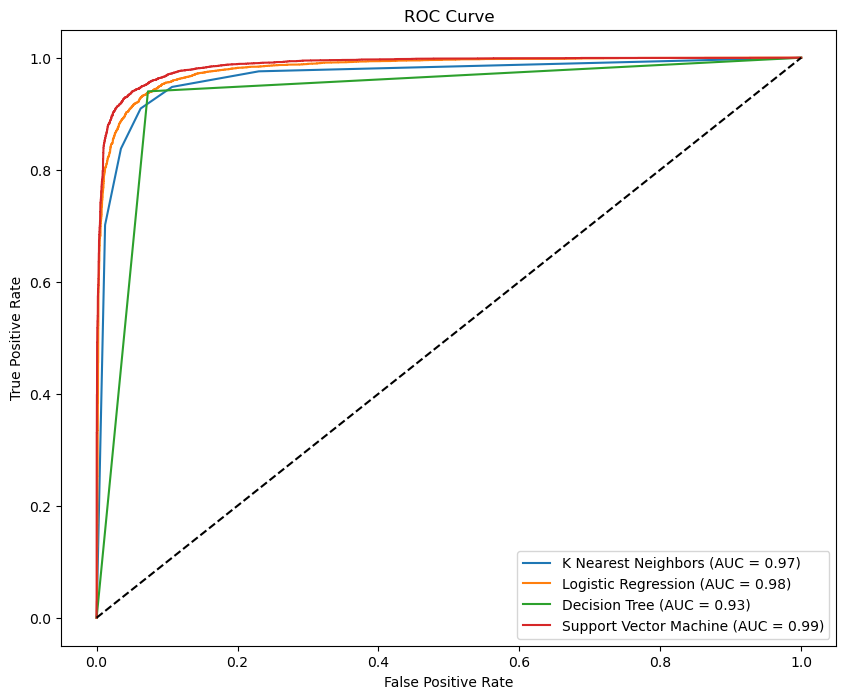

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Assuming df = bnk
df = bnk

# Identify categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 
            'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and Evaluate Models
models = {
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Model Performance Comparison Conclusion

## K Nearest Neighbors (KNN)
- **Precision**: 0.91 (Class 0), 0.94 (Class 1)
- **Recall**: 0.94 (Class 0), 0.91 (Class 1)
- **F1-Score**: 0.92 (both classes)
- **Accuracy**: 0.92

## Logistic Regression
- **Precision**: 0.92 (Class 0), 0.94 (Class 1)
- **Recall**: 0.94 (Class 0), 0.92 (Class 1)
- **F1-Score**: 0.93 (both classes)
- **Accuracy**: 0.93

## Decision Tree
- **Precision**: 0.94 (Class 0), 0.93 (Class 1)
- **Recall**: 0.93 (Class 0), 0.94 (Class 1)
- **F1-Score**: 0.93 (both classes)
- **Accuracy**: 0.93

## Support Vector Machine (SVM)
- **Precision**: 0.94 (Class 0), 0.95 (Class 1)
- **Recall**: 0.95 (Class 0), 0.94 (Class 1)
- **F1-Score**: 0.94 (both classes)
- **Accuracy**: 0.94

## Summary
- **KNN**: Balanced performance with slightly lower accuracy compared to others.
- **Logistic Regression**: High precision and recall, with a slight edge in accuracy.
- **Decision Tree**: Consistent performance with high precision and recall.
- **SVM**: Best overall performance with the highest accuracy and balanced precision and recall.

Each model performs well, but the Support Vector Machine has the highest accuracy and balanced metrics, making it the best performer in this comparison.